In [1]:
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import polyfit
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings


In [ ]:
agfile='E:/desk/assend/N-Focus Sample Data/N-Focus Sample Data/listagenthour.csv'
aghrdf = read_csv(agfile)
aghrdf['CMD_TIME']=pd.DatetimeIndex(aghrdf['CMD_TIME'])
aghrdf['date']=pd.DatetimeIndex(aghrdf['CMD_TIME']).date
aghrdf['time']=pd.DatetimeIndex(aghrdf['CMD_TIME']).time
if False:
    aghrdf.head()
agh=aghrdf
agh=agh.rename(columns={'CMD_TIME':'ct','AGENTNUM':'an','INFOID':'iid','ACD_CALLS':'ac','AVG_TALK_TIME':'att','TOT_AFTER_CALL_TIME':'tact','TOT_AVAIL_TIME':'tat','TOT_AUX':'ta','EXTN_CALLS':'ec','AVG_EXTN_TIME':'aet','TOT_TIME_STAFFED':'tts','TOT_HOLD_TIME':'tht'})
attser=pd.Series(agh['ac']*agh['att'])
attser.index=agh['ct']
if False:
    attser.tail()

hagent = attser.groupby(pd.TimeGrouper('H')).sum()
if False:
    hagent 

ct
2017-04-01    169949
2017-04-02     21038
2017-04-03    974982
2017-04-04    966584
2017-04-05    853988
2017-04-06    824754
2017-04-07    699606
2017-04-08    161663
2017-04-09     60366
2017-04-10    913811
2017-04-11    898566
2017-04-12    815529
2017-04-13    227552
Freq: D, dtype: int64


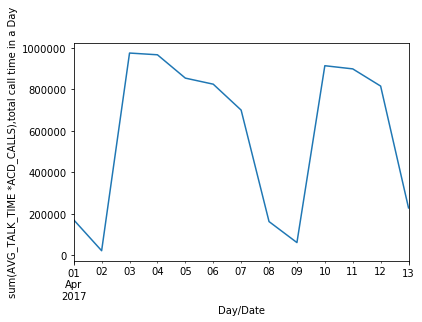

In [18]:
Dagent=hagent.groupby(pd.TimeGrouper('D')).sum()
print_full(Dagent)
Dagent.plot()
pyplot.xlabel('Day/Date')
pyplot.ylabel('sum(AVG_TALK_TIME *ACD_CALLS),total call time in a Day')
pyplot.show()

count       300.000000
mean      25294.626667
std       34281.660869
min           0.000000
25%           0.000000
50%        3657.500000
75%       50274.500000
max      108417.000000
dtype: float64
count       175.000000
mean      43362.217143
std       35093.517310
min         324.000000
25%        8595.000000
50%       40001.000000
75%       78202.000000
max      108417.000000
dtype: float64


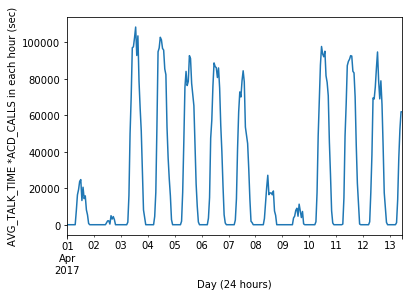

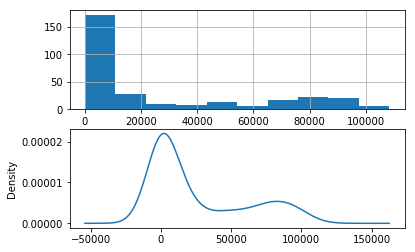

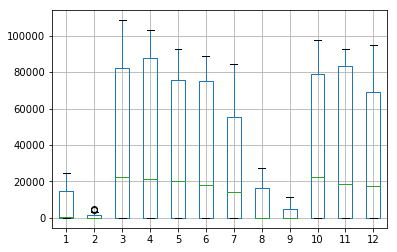

In [9]:
#summary statistics
print hagent.describe()

print hagent[hagent>0].describe()

hagent.plot()
pyplot.xlabel('Day (24 hours)')
pyplot.ylabel('AVG_TALK_TIME *ACD_CALLS in each hour (sec)')
pyplot.show()

pyplot.figure(1)
pyplot.subplot(211)
hagent.hist()
pyplot.subplot(212)
hagent.plot(kind='kde')
pyplot.show()


#boxplot for each day
groups=hagent.groupby(pd.TimeGrouper('D'))
dayDF=pd.DataFrame()
for name,group in groups:
    if len(group.values)==24:
        dayDF[name.day]=group.values
    
dayDF.boxplot()
pyplot.show()

In [ ]:
#hagent
hagent=hagent.astype('float32')

testfactor=.7
split=int(len(hagent)*.7)
train=hagent[0:split]
test=hagent[split:len(hagent)]


In [153]:
#baseline model
def perisitance_model(history):
    return history[-1]


In [170]:
history=[x for x in train]
predictions=list()
for i in range(len(test)):
    yhat=perisitance_model(history)
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    

eval_predictions(test,predictions)

RMSE: 11745.263
None


In [149]:
def eval_predictions(test,predictions):
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    print('RMSE: %.3f' % rmse)

In [174]:
#cal d perameter
#reject null hypothesis means stationary

def defference(dataset):
    dif=list()
    for i in range(1,len(dataset)):
      dif.append(dataset[i]-dataset[i-1])  
    return pd.Series(dif)

stationary=defference(hagent)
stationary.index=hagent.index[1:]
result=adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    


ADF Statistic: -8.433288
p-value: 0.000000
Critical Values:
	5%: -2.872
	1%: -3.454
	10%: -2.572


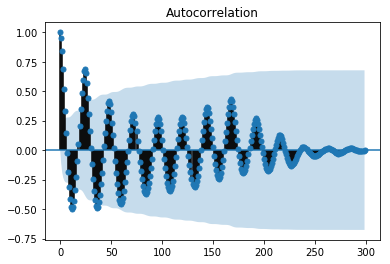

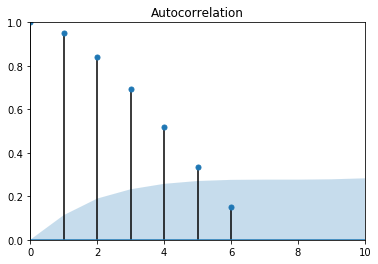

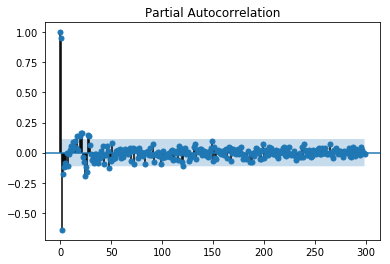

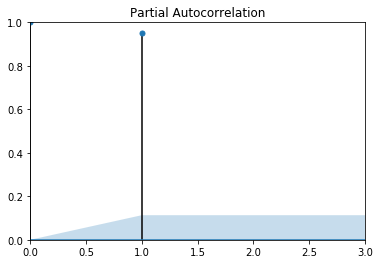

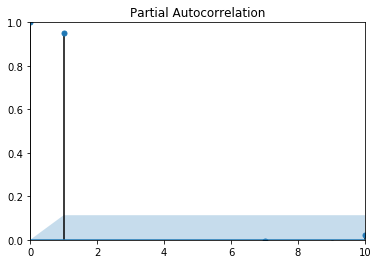

In [204]:
#find q(lag value)
plot_acf(hagent)
#pyplot.show()
plot_acf(hagent)
pyplot.axis([0,10,0,1])
pyplot.show()

#pyplot.xlim(10)
# 

plot_pacf(hagent)
pyplot.show()
plot_pacf(hagent,ax=pyplot.gca())
pyplot.axis([0,3,0,1])
pyplot.show()
plot_pacf(hagent,ax=pyplot.gca())
pyplot.axis([0,10,0,1])
pyplot.show()


In [56]:


def cal_residuals(test_y,predictions):
    residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
    residuals = pd.DataFrame(residuals)
    print "sample res:"
    print residuals.head()
    return residuals
def plot_residuals(residuals):
    #residuals.plot()
    #residuals.hist() 
    # density plot
    #residuals.plot(kind='kde')
    autocorrelation_plot(residuals)
    #qqplot(residuals, line='r')
    pyplot.show()
#check bias correction    
def des_residuals(residuals):
    print(residuals.describe())
def eda(values):
        
        bp=pyplot.boxplot(values)
         
        outliers = [flier.get_ydata() for flier in bp["fliers"]]
        print "outliers:",outliers
        pyplot.show()
        
        values.plot(kind='kde')
        
        pyplot.show()
        

outliers: [array([], dtype=int64)]


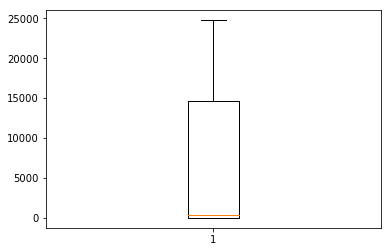

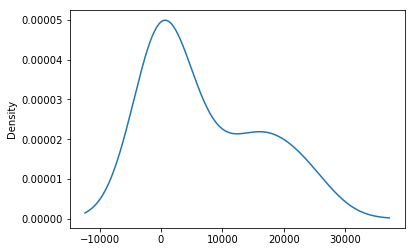

outliers: [array([4954, 4460], dtype=int64)]


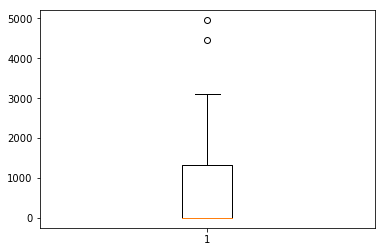

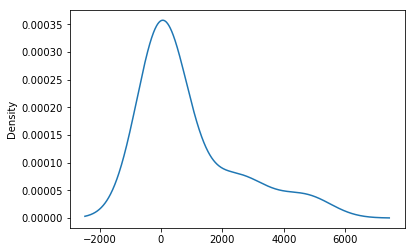

outliers: [array([], dtype=int64)]


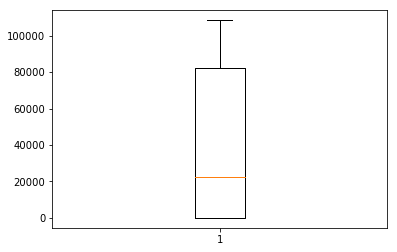

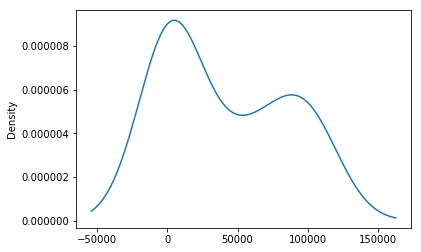

outliers: [array([], dtype=int64)]


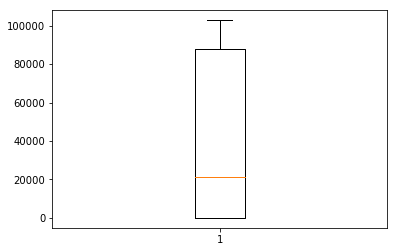

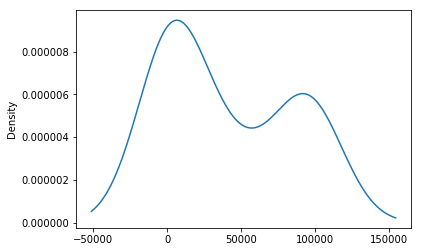

outliers: [array([], dtype=int64)]


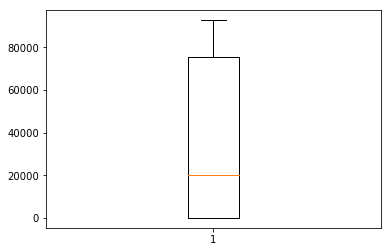

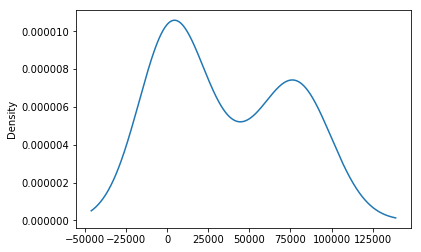

outliers: [array([], dtype=int64)]


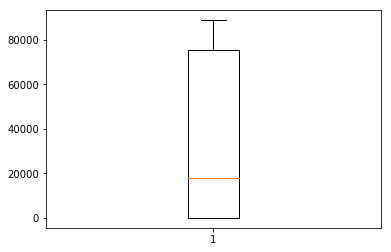

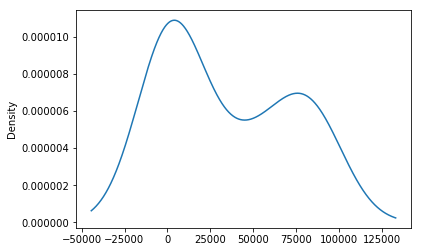

outliers: [array([], dtype=int64)]


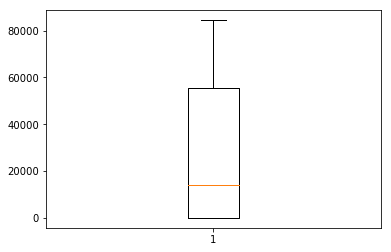

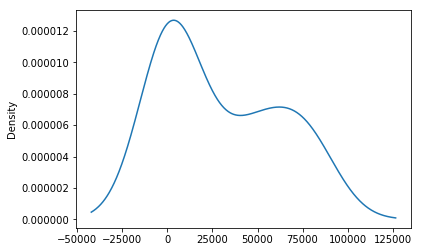

outliers: [array([], dtype=int64)]


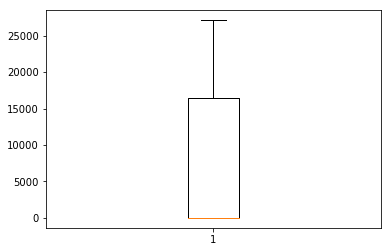

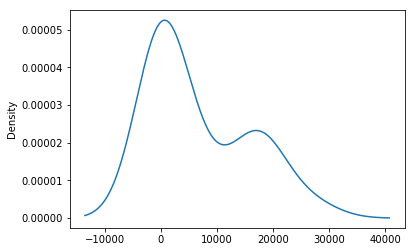

outliers: [array([], dtype=int64)]


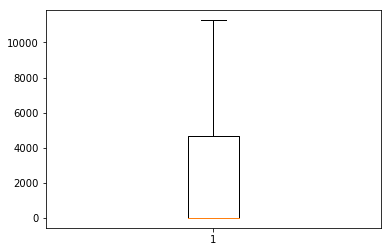

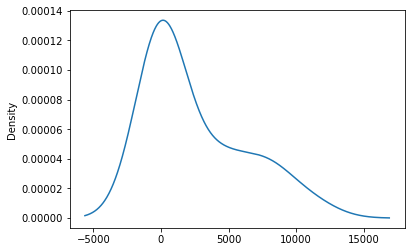

outliers: [array([], dtype=int64)]


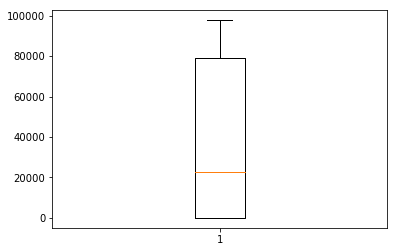

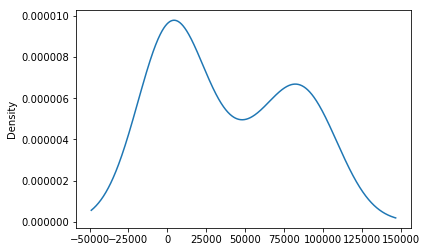

outliers: [array([], dtype=int64)]


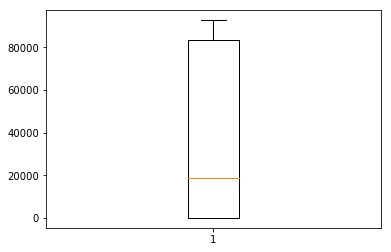

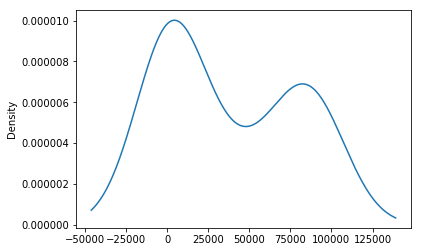

outliers: [array([], dtype=int64)]


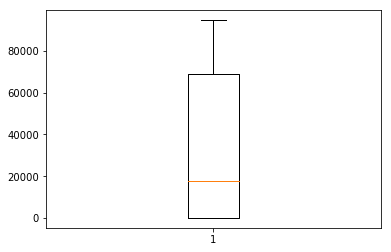

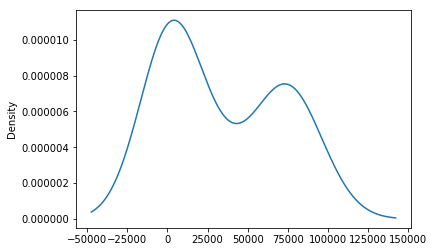

outliers: [array([], dtype=int64)]


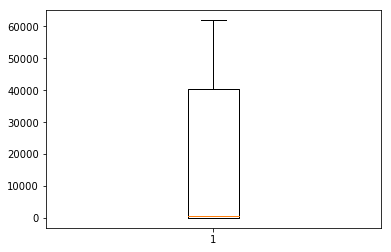

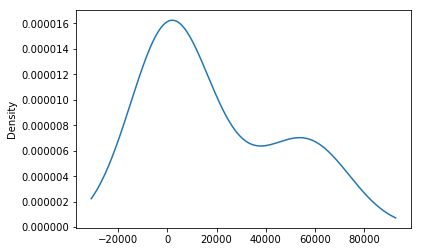

In [75]:
for i in range(1,14):
    if i<10:
        st="2017-04-0"+str(i)
    else:
        st="2017-04-"+str(i)    
    
    tagent=hagent[st]
    eda(tagent)
    

In [147]:
hagentdf=pd.DataFrame()
hagentdf["hour"]=hagent.index.hour
hagentdf["weekday"]=hagent.index.weekday

hagentdf["call"]=hagent.values

hagentdf.index=hagent.index
hagentdf[(hagentdf["weekday"]==5)&(hagentdf["hour"]==10)]

,hour,weekday,call
ct,,,
2017-04-01 10:00:00,10,5,19261
2017-04-08 10:00:00,10,5,20355


In [140]:
len(hagent.index)

300

In [133]:
cmpindex.values

[array([[ 0,  5],
        [ 1,  5],
        [ 2,  5],
        [ 3,  5],
        [ 4,  5],
        [ 5,  5],
        [ 6,  5],
        [ 7,  5],
        [ 8,  5],
        [ 9,  5],
        [10,  5],
        [11,  5],
        [12,  5],
        [13,  5],
        [14,  5],
        [15,  5],
        [16,  5],
        [17,  5],
        [18,  5],
        [19,  5],
        [20,  5],
        [21,  5],
        [22,  5],
        [23,  5],
        [ 0,  6],
        [ 1,  6],
        [ 2,  6],
        [ 3,  6],
        [ 4,  6],
        [ 5,  6],
        [ 6,  6],
        [ 7,  6],
        [ 8,  6],
        [ 9,  6],
        [10,  6],
        [11,  6],
        [12,  6],
        [13,  6],
        [14,  6],
        [15,  6],
        [16,  6],
        [17,  6],
        [18,  6],
        [19,  6],
        [20,  6],
        [21,  6],
        [22,  6],
        [23,  6],
        [ 0,  0],
        [ 1,  0],
        [ 2,  0],
        [ 3,  0],
        [ 4,  0],
        [ 5,  0],
        [ 6,  0],
        [ 

      0  0                  ct
0     0  5 2017-04-01 00:00:00
1     1  5 2017-04-01 01:00:00
2     2  5 2017-04-01 02:00:00
3     3  5 2017-04-01 03:00:00
4     4  5 2017-04-01 04:00:00
5     5  5 2017-04-01 05:00:00
6     6  5 2017-04-01 06:00:00
7     7  5 2017-04-01 07:00:00
8     8  5 2017-04-01 08:00:00
9     9  5 2017-04-01 09:00:00
10   10  5 2017-04-01 10:00:00
11   11  5 2017-04-01 11:00:00
12   12  5 2017-04-01 12:00:00
13   13  5 2017-04-01 13:00:00
14   14  5 2017-04-01 14:00:00
15   15  5 2017-04-01 15:00:00
16   16  5 2017-04-01 16:00:00
17   17  5 2017-04-01 17:00:00
18   18  5 2017-04-01 18:00:00
19   19  5 2017-04-01 19:00:00
20   20  5 2017-04-01 20:00:00
21   21  5 2017-04-01 21:00:00
22   22  5 2017-04-01 22:00:00
23   23  5 2017-04-01 23:00:00
24    0  6 2017-04-02 00:00:00
25    1  6 2017-04-02 01:00:00
26    2  6 2017-04-02 02:00:00
27    3  6 2017-04-02 03:00:00
28    4  6 2017-04-02 04:00:00
29    5  6 2017-04-02 05:00:00
30    6  6 2017-04-02 06:00:00
31    7 

In [126]:
hagent.head()

ct
2017-04-01 00:00:00    0
2017-04-01 01:00:00    0
2017-04-01 02:00:00    0
2017-04-01 03:00:00    0
2017-04-01 04:00:00    0
Freq: H, dtype: int64

           t+1       t-1       t-2       t-3       t-4       t-5       t-6  \
t+1   1.000000  0.952875  0.845306  0.696754  0.522889  0.337577  0.150464   
t-1   0.952875  1.000000  0.952693  0.844967  0.696997  0.525149  0.340985   
t-2   0.845306  0.952693  1.000000  0.952680  0.845538  0.699651  0.529103   
t-3   0.696754  0.844967  0.952680  1.000000  0.952968  0.847462  0.702822   
t-4   0.522889  0.696997  0.845538  0.952968  1.000000  0.953697  0.849107   
t-5   0.337577  0.525149  0.699651  0.847462  0.953697  1.000000  0.953877   
t-6   0.150464  0.340985  0.529103  0.702822  0.849107  0.953877  1.000000   
t-7  -0.025600  0.153503  0.344589  0.532090  0.704416  0.849212  0.953799   
t-8  -0.185655 -0.023046  0.156585  0.347220  0.533498  0.704359  0.848949   
t-9  -0.321400 -0.183542 -0.020456  0.158852  0.348425  0.533248  0.703839   
t-10 -0.424728 -0.319659 -0.181400 -0.018533  0.159847  0.347961  0.532418   
t-11 -0.489399 -0.423270 -0.317895 -0.179789 -0.017737  0.159161

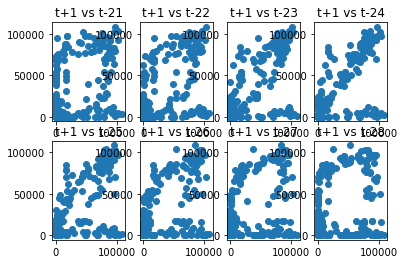

In [141]:
values = pd.DataFrame(hagent.values)
lags = 28
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
print print_full(dataframe[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].corr())
pyplot.figure(1)
for i in range(1,(8 + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i+20))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i+20)].values)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  299
Model:                ARIMA(15, 1, 0)   Log Likelihood               -3088.467
Method:                       css-mle   S.D. of innovations           7380.829
Date:                Fri, 28 Apr 2017   AIC                           6210.934
Time:                        13:46:23   BIC                           6273.842
Sample:                    04-01-2017   HQIC                          6236.113
                         - 04-13-2017                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         73.2006    336.693      0.217      0.828      -586.705   733.107
ar.L1.D.y      0.4635      0.057      8.071      0.000         0.351     0.576
ar.L2.D.y     -0.0026      0.063     -0.042      0.9

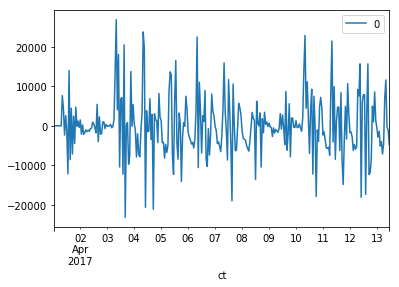

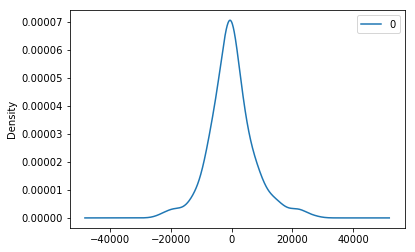

                  0
count    299.000000
mean      13.310979
std     7398.141177
min   -23181.889047
25%    -4102.717541
50%     -417.532781
75%     3392.434109
max    26828.281274


In [9]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = hagent

# fit model
model = ARIMA(series, order=(15,1,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=911.786679, expected=0.000000
predicted=711.139828, expected=0.000000
predicted=1945.053235, expected=0.000000
predicted=428.816226, expected=0.000000
predicted=758.988423, expected=3715.000000
predicted=5302.622078, expected=4674.000000
predicted=5194.718947, expected=7906.000000
predicted=9050.318644, expected=9041.000000
predicted=9476.663180, expected=4656.000000
predicted=2741.636756, expected=11268.000000
predicted=12952.360842, expected=7441.000000
predicted=6544.983836, expected=3924.000000
predicted=1079.318386, expected=7265.000000
predicted=7611.336812, expected=476.000000
predicted=-625.617202, expected=0.000000
predicted=-3231.541373, expected=0.000000


C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=489.312321, expected=0.000000
predicted=1253.901210, expected=0.000000
predicted=-2690.772716, expected=0.000000
predicted=1209.168168, expected=0.000000
predicted=627.498987, expected=0.000000
predicted=-1393.363446, expected=0.000000
predicted=896.769272, expected=0.000000
predicted=1510.917024, expected=0.000000
predicted=-1262.686899, expected=1625.000000
predicted=3764.510463, expected=17759.000000
predicted=25486.313681, expected=48681.000000
predicted=62724.493991, expected=67505.000000
predicted=77232.073914, expected=87545.000000
predicted=95469.843885, expected=97755.000000
predicted=101970.787855, expected=93625.000000
predicted=88567.488297, expected=92119.000000
predicted=84587.673159, expected=95157.000000
predicted=94565.968579, expected=81694.000000
predicted=69797.790664, expected=78088.000000
predicted=69540.237205, expected=70804.000000
predicted=64800.825882, expected=45434.000000
predicted=29559.402257, expected=27425.000000
predicted=10664.189183, expect

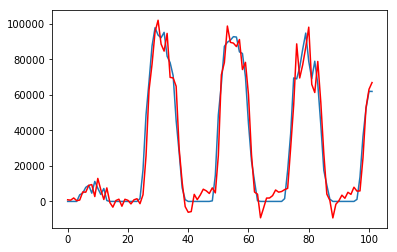

In [11]:
X = hagent.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(15,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 15
Coefficients: [  2.45453395e+03   1.45300058e+00  -4.48523340e-01  -5.70095128e-02
  -6.89775632e-02   1.48292896e-01  -2.09902378e-01   1.57537564e-01
  -6.53407577e-02  -2.81691196e-02  -2.27741695e-02   6.19507236e-02
  -7.47397722e-02   2.79502264e-02  -1.07275649e-02   4.20544802e-02]
predicted=4932.800095, expected=1572.000000
predicted=7707.010379, expected=17494.000000
predicted=29454.030182, expected=38192.000000
predicted=51896.758205, expected=69500.000000
predicted=86048.377144, expected=68974.000000
predicted=68826.988547, expected=75436.000000
predicted=76810.293026, expected=85707.000000
predicted=86665.152762, expected=94742.000000
predicted=97557.908529, expected=78853.000000
predicted=64913.945518, expected=69031.000000
predicted=60709.742284, expected=78919.000000
predicted=76954.925912, expected=66038.000000
predicted=55211.644440, expected=43161.000000
predicted=24243.699730, expected=17492.000000
predicted=541.328164, expected=9152.000000
predicted=228.457

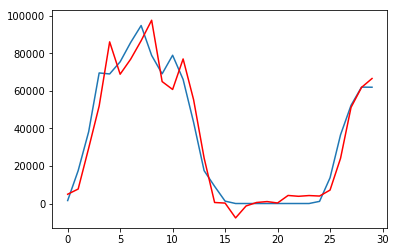

In [96]:
X = hagent.values
train, test = X[1:len(X)-30], X[len(X)-30:]
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.xlabel("hour in a Day")
pyplot.ylabel("total calls time in a hour")
pyplot.show()

In [21]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse,model_fit,predictions,test    

In [19]:

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg,best_model,best_predictions,test = float("inf"), None,None,None,None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse,model_fit,predictions,test = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg,best_model,best_predictions = rmse, order,model_fit,predictions
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                        continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_model,best_predictions,test,best_cfg





ARIMA(0, 0, 0) RMSE=35608.843
ARIMA(0, 0, 1) RMSE=19376.025
ARIMA(0, 1, 0) RMSE=11100.571
ARIMA(0, 1, 1) RMSE=8972.738
ARIMA(0, 1, 2) RMSE=8618.381
ARIMA(1, 0, 0) RMSE=11002.220
ARIMA(1, 0, 1) RMSE=8832.524
ARIMA(1, 0, 2) RMSE=8431.999
ARIMA(1, 1, 0) RMSE=8242.921
ARIMA(1, 1, 1) RMSE=8284.618
ARIMA(1, 1, 2) RMSE=8316.467
ARIMA(2, 0, 0) RMSE=7732.019
ARIMA(2, 0, 1) RMSE=7677.246
ARIMA(2, 0, 2) RMSE=7580.289
ARIMA(2, 1, 0) RMSE=8292.212
ARIMA(2, 1, 1) RMSE=8303.080
ARIMA(2, 1, 2) RMSE=7805.150
ARIMA(3, 0, 0) RMSE=7725.750
ARIMA(3, 0, 1) RMSE=7581.184
ARIMA(3, 1, 0) RMSE=8315.084
ARIMA(3, 1, 1) RMSE=7771.226
ARIMA(4, 0, 0) RMSE=7662.472
ARIMA(4, 0, 1) RMSE=7743.187
ARIMA(4, 0, 2) RMSE=7586.269
ARIMA(4, 1, 0) RMSE=8313.009
ARIMA(4, 1, 1) RMSE=8312.759
ARIMA(4, 1, 2) RMSE=7737.814
ARIMA(5, 0, 0) RMSE=7639.449
ARIMA(5, 0, 1) RMSE=7675.215
ARIMA(5, 0, 2) RMSE=7606.023
ARIMA(5, 1, 0) RMSE=8292.770
ARIMA(5, 1, 1) RMSE=8164.767
ARIMA(5, 1, 2) RMSE=7734.348
ARIMA(6, 0, 0) RMSE=7671.959
ARIMA(6, 0

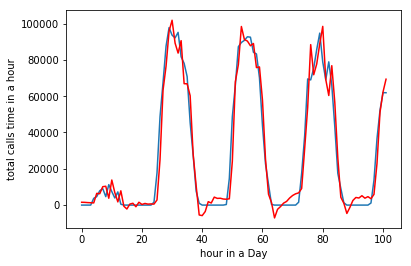

In [22]:
warnings.filterwarnings("ignore")
model_fit,predictions,test,final_cfg=evaluate_models(hagent.values,[0,1,2,3,4,5,6],[0,1],[0,1,2])
forecast, stderr, conf = model_fit.forecast()

print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))
fig = pyplot.figure()
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.xlabel("hour in a Day")
pyplot.ylabel("total calls time in a hour")

pyplot.show()

In [35]:
train_size = int(len(hagent) * 0.66)
testser=pd.Series(test,index=hagent.index[train_size:])
predser=pd.Series(predictions,index=hagent.index[train_size:])


102


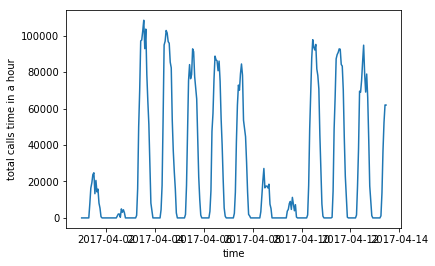

In [38]:
print len(predser)
pyplot.plot(hagent)

pyplot.xlabel("time")

pyplot.ylabel("total calls time in a hour")

pyplot.show()

In [209]:
def create_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X))
    train = X
    history = [x for x in train]
    # make predictions
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
           
    
    return model_fit

In [210]:
model_fit=create_arima_model(hagent.values,(6, 1, 2))
forecast, stderr, conf = model_fit.forecast()
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))




Forecast: 63373.218
Standard Error: 7396.463
95% Confidence Interval: 48876.417 to 77870.020


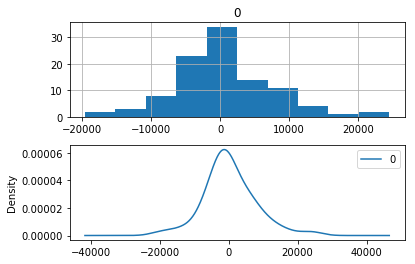

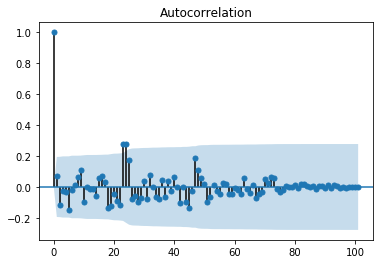

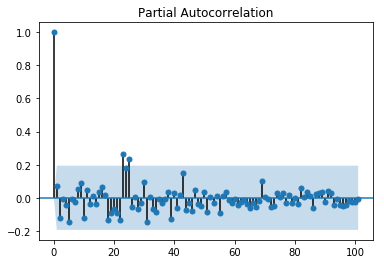

In [219]:
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

plot_acf(residuals, ax=pyplot.gca())
pyplot.show()
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [94]:
days=pd.DataFrame()
groups = attser.groupby(pd.TimeGrouper('D'))

for name,group in groups:
    
    
   
    tser=group.groupby(pd.TimeGrouper('H')).sum()
    tser.index=tser.index.hour   
    days[name.date()]=tser
   
    
    
     
   

,2017-04-01,2017-04-02,2017-04-03,2017-04-04,2017-04-05,2017-04-06,2017-04-07,2017-04-08,2017-04-09,2017-04-10,2017-04-11,2017-04-12,2017-04-13
0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0.0
6,0,0,1390,4500,1924,3600,2520,0,0,1625,324,1572,1136.0
7,0,0,16069,17774,17818,14908,14159,0,0,17759,14731,17494,13712.0
8,7655,0,49893,54140,45203,47474,41611,3433,0,48681,48719,38192,36577.0
9,16348,0,69970,94843,75311,57306,61845,11787,0,67505,66100,69500,52268.0


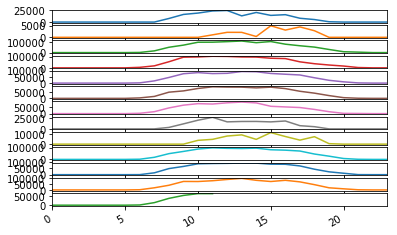

In [95]:
days.plot(subplots=True, legend=False)
pyplot.show()

In [28]:
hgroup = attser.groupby(pd.TimeGrouper('H')).sum()

if False:
    hgroup.to_csv('C:/Users/naresh.srikakulapu/Desktop/assend/N-Focus Sample Data/N-Focus Sample Data/hgroupagent.csv',header=True)
    


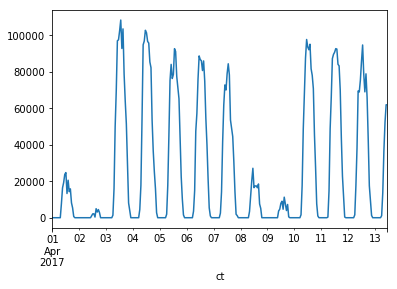

In [102]:

hgrps = attser.groupby(pd.TimeGrouper('H')).sum()

hgrps.plot()
pyplot.show()

In [11]:
hgroup.head()

ct
2017-04-01 00:00:00    0
2017-04-01 01:00:00    0
2017-04-01 02:00:00    0
2017-04-01 03:00:00    0
2017-04-01 04:00:00    0
Freq: H, dtype: int64

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


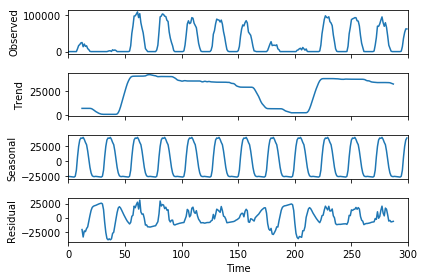

In [18]:
c.head()

result = seasonal_decompose(hagent.values,model='additive',freq=24)
#result = seasonal_decompose(dgroup,model='multiplicative')
result.plot()
pyplot.show()

#resample=attser.resample('H')
#hourly_sum_sample=resample.sum()

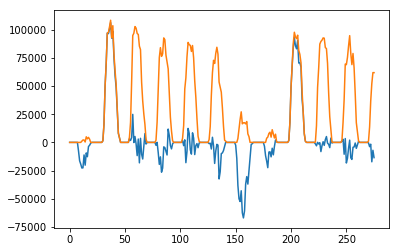

In [26]:
X=hagent.values
diff=list()
for i in range(24, len(X)):
    
    value = X[i] - X[i - 24]
    
    diff.append(value)
pyplot.plot(diff)
pyplot.plot(hagent.values[24:len(hagent.values)])
pyplot.show()

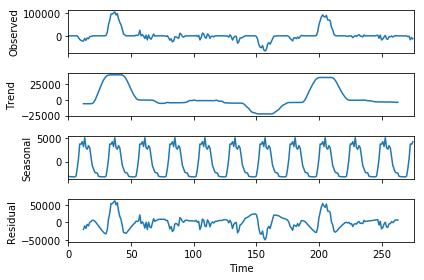

In [27]:
result = seasonal_decompose(diff,model='additive',freq=24)
#result = seasonal_decompose(dgroup,model='multiplicative')
result.plot()
pyplot.show()

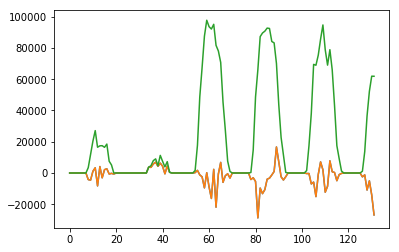

In [37]:
days_in_wek=7*24
X = hagent.values
diff = list()
for i in range(days_in_wek, len(X)):
    value = X[i] - X[i - days_in_wek]
    diff.append(value)
pyplot.plot(diff)
pyplot.plot(hagent.values[7*24:len(hagent)])

pyplot.show()



C:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Coefficients: [ -3.13074931e-74   2.13843766e-71  -3.66434508e-69  -3.14418956e-67
   6.79211951e-65   1.40452141e-62   4.33606331e-62  -3.58391247e-58
  -5.85161619e-56  -3.05207919e-55   1.54548984e-51   2.90557298e-49
   1.07785810e-47  -6.15726348e-45  -1.45525628e-42  -9.41715180e-41
   2.44906981e-38   7.08603212e-36   5.15649213e-34  -1.20229710e-31
  -3.39319288e-29  -1.44326262e-27   8.03963388e-25   1.37048910e-22
  -1.02633212e-20  -4.83468532e-18   7.63525702e-17   1.44997363e-13
  -6.69150190e-12  -3.77306870e-09   7.81540704e-07  -7.75788856e-05
   4.78091992e-03  -1.95815582e-01   5.41138959e+00  -9.95999908e+01
   1.17689740e+03  -8.35659000e+03   3.16631984e+04  -4.84611615e+04
   1.06461874e+04]


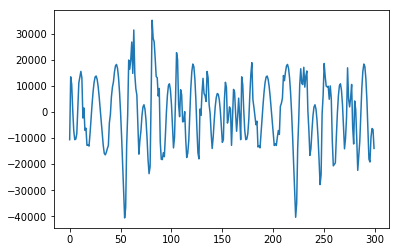

In [50]:
X = [i%(7*24) for i in range(0, len(hagent))]
y = hagent.values
degree = 40
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
values = hagent.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [52]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.062543
p-value: 0.000000
Critical Values:
	5%: -2.872
	1%: -3.454
	10%: -2.572


In [41]:
hagent.head()

ct
2017-04-01 00:00:00    0
2017-04-01 01:00:00    0
2017-04-01 02:00:00    0
2017-04-01 03:00:00    0
2017-04-01 04:00:00    0
Freq: H, dtype: int64

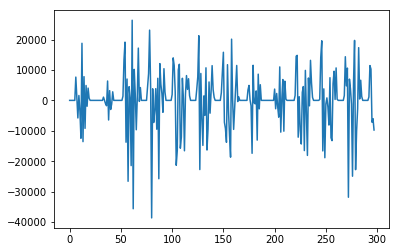

In [56]:
diffdiff=list()
for i in range(1, len(diff)):
    value = diff[i] - diff[i - 1]
    diffdiff.append(value)
pyplot.plot(diffdiff)
pyplot.show()    


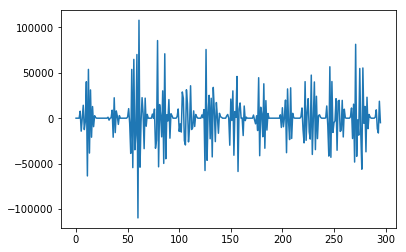

In [58]:
diffdiffdiffdiff=list()
for i in range(1, len(diffdiffdiff)):
    value = diffdiffdiff[i] - diffdiffdiff[i - 1]
    diffdiffdiffdiff.append(value)
pyplot.plot(diffdiffdiffdiff)
pyplot.show() 

In [55]:
print len(hgroup.values[1:])

df=pd.DataFrame()
df["hgroup"]=hgroup.values[1:]
df["diff"]=pd.Series(diff)
print_full(df)

299
     hgroup   diff
0         0      0
1         0      0
2         0      0
3         0      0
4         0      0
5         0      0
6         0      0
7      7655   7655
8     16348   8693
9     19261   2913
10    23783   4522
11    24754    971
12    13277 -11477
13    20564   7287
14    14292  -6272
15    15818   1526
16     8149  -7669
17     5377  -2772
18      671  -4706
19        0   -671
20        0      0
21        0      0
22        0      0
23        0      0
24        0      0
25        0      0
26        0      0
27        0      0
28        0      0
29        0      0
30        0      0
31        0      0
32        0      0
33        0      0
34     1067   1067
35     2140   1073
36     2130    -10
37      358  -1772
38     4954   4596
39     3107  -1847
40     4460   1353
41     2822  -1638
42        0  -2822
43        0      0
44        0      0
45        0      0
46        0      0
47        0      0
48        0      0
49        0      0
50        0      0
51      

In [ ]:
'C:/Users/naresh.srikakulapu/Desktop/kn/code/code/chapter_09/daily-total-female-births.csv', header=0

In [11]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')